### Project: EDA for Cab Investment firm

#### Author: _Chooladeva Piyasiri_
---

### Importing the required libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
plt.style.use('seaborn-white')
%matplotlib inline

warnings.filterwarnings("ignore")

### Importing the datasets using pandas 

In [2]:
data_cab= pd.read_csv('Cab_Data.csv')
data_city= pd.read_csv('City.csv')
data_cus= pd.read_csv('Customer_ID.csv')
data_trans= pd.read_csv('Transaction_ID.csv')

## Part 1: Data Wrangling & Data Cleaning  Process  

### Descriptive Analysis

#### 1. Displaying the Variable Names and their Data Types

- **Cab_Data Dataset**

In [3]:
data_cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

**Setting Date of Travel as “datetime64” data type.**

In [4]:
x = data_cab['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in x]
data_cab['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

- **City Dataset**

In [5]:
data_city.dtypes

City          object
Population    object
Users         object
dtype: object

**Setting Population as integer data type**

In [6]:
data_city['Population'] = [x.replace(',','') for x in data_city['Population']]
data_city['Population'] = data_city['Population'].astype(int)


**Setting Users as integer data type**   

In [7]:
data_city['Users'] = [x.replace(',','') for x in data_city['Users']]
data_city['Users'] = data_city['Users'].astype(int)

- **Customer_ID Dataset**

In [8]:
data_cus.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

- **Transaction_ID Dataset**

In [9]:
data_trans.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

#### 2. Displaying the Complete Meta-Data of the dataset

- **Cab_Data Dataset**

In [10]:
data_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [11]:
data_cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


- **City Dataset**

In [12]:
data_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 448.0+ bytes


- **Customer_ID Dataset**

In [13]:
data_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


- **Transaction_ID Dataset**

In [14]:
data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


#### 3. Descriptive Statistics

- **Cab_Data Dataset**

In [15]:
data_cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


- **City Dataset**

In [16]:
data_city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


- **Customer_ID Dataset**

In [17]:
data_cus.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


- **Transaction_ID Dataset**

In [18]:
data_trans.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


### Merging datasets to create the master dataset

In [19]:
data= data_cab.merge(data_trans, on= 'Transaction ID').merge(data_cus, on ='Customer ID').merge(data_city, on = 'City')
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701


#### Adding Year, Month, Day and Profit Margin columns 

In [20]:
data['Year'] = data['Date of Travel'].dt.year
data['Month'] = data['Date of Travel'].dt.month
data['Day'] = data['Date of Travel'].dt.day
data['Profit'] = data['Price Charged'] - data['Cost of Trip']
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Day,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,2016,1,7,57.3150
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,2018,7,20,281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,2018,11,22,194.6480
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,2016,1,5,23.6660
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,2018,4,20,253.9808


In [21]:
# Determining number of rows and columns of the DataFrame

data.shape

(359392, 18)

### Detecting duplicates

In [22]:
duplicated = data[data.duplicated(['Transaction ID', 'Customer ID'])]
print("Duplicate Rows :")
 
duplicated

Duplicate Rows :


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Day,Profit


**As we can see that there are no duplicate observations in our data and hence each observation is unique.**

### Detecting the Missing Values

In [23]:
data.isna().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Year                  0
Month                 0
Day                   0
Profit                0
dtype: int64

**Here we don't see any missing values**

In [24]:
# Descriptive Statistics of the master dataset

data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,Year,Month,Day,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,2017.041693,7.509243,15.641700,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,0.801378,3.428929,8.838986,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,2016.000000,1.000000,1.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,2016.000000,5.000000,8.000000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,2017.000000,8.000000,16.000000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,2018.000000,11.000000,23.000000,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,2018.000000,12.000000,31.000000,1463.966000


---
## PART 2- Exploratory Data Analysis

### Figure 01: Distribution of Cab users (Company wise)

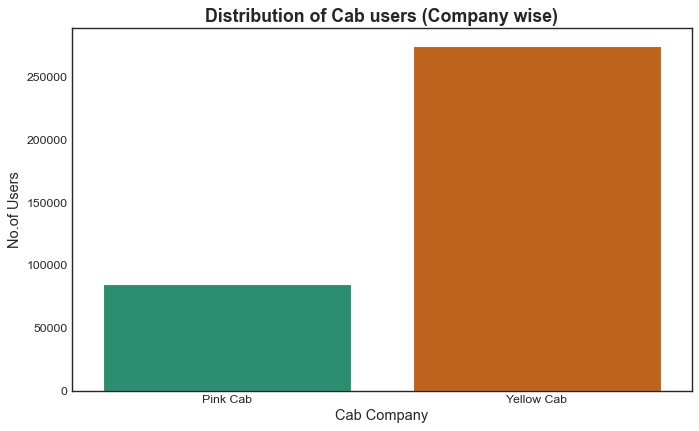

In [25]:
# visualizing the number of pink and yellow cab users

plt.figure(figsize=(10, 6), dpi=80)
sns.countplot(data.Company, palette= "Dark2")
plt.title('Distribution of Cab users (Company wise)', fontweight="bold", fontsize= 16)
plt.xlabel('Cab Company', fontsize= 13)
plt.ylabel('No.of Users', fontsize= 13);

> - **Users prefer to ride in the 'Yellow Cab' over the 'Pink Cab.'**

### Figure 02: Distribution of Price Charged with respect to Cab Company

<Figure size 960x480 with 0 Axes>

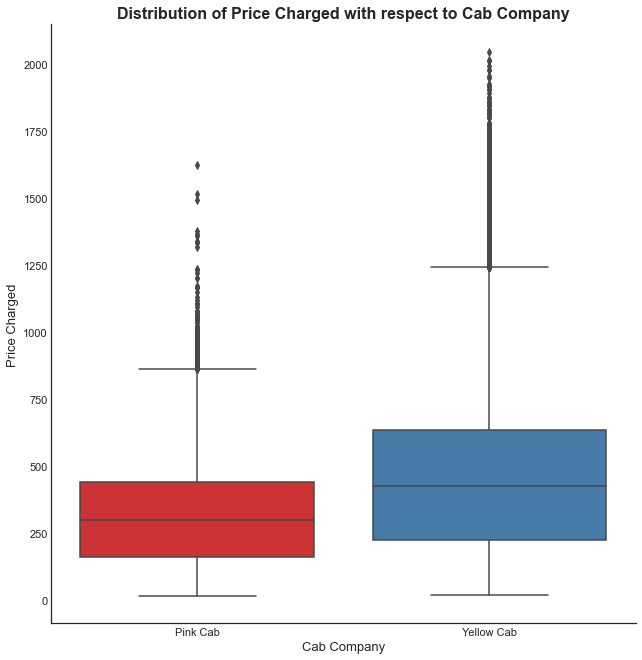

In [26]:
plt.figure(figsize=(12, 6), dpi=80)
sns.catplot(x="Company", y="Price Charged", kind="box", data=data, height=9, order=["Pink Cab", "Yellow Cab"], aspect=1,
           palette="Set1")

plt.title('Distribution of Price Charged with respect to Cab Company', fontweight="bold", fontsize= 16)
plt.xlabel('Cab Company', fontsize= 13)
plt.ylabel('Price Charged', fontsize= 13);

> - **The Price Charged of 'Yellow Cab' is highest as compared to 'Pink Cab'. And also, The price charge range for Yellow cab is more than the Pink cab.**
- **And also, the 'Yellow cab' has a higher price range than the 'Pink cab'.**
> - **These outliers can be caused due to the use of high-end cars, the weather, or the holiday season.**

### Figure 03: Distribution of Payment Mode

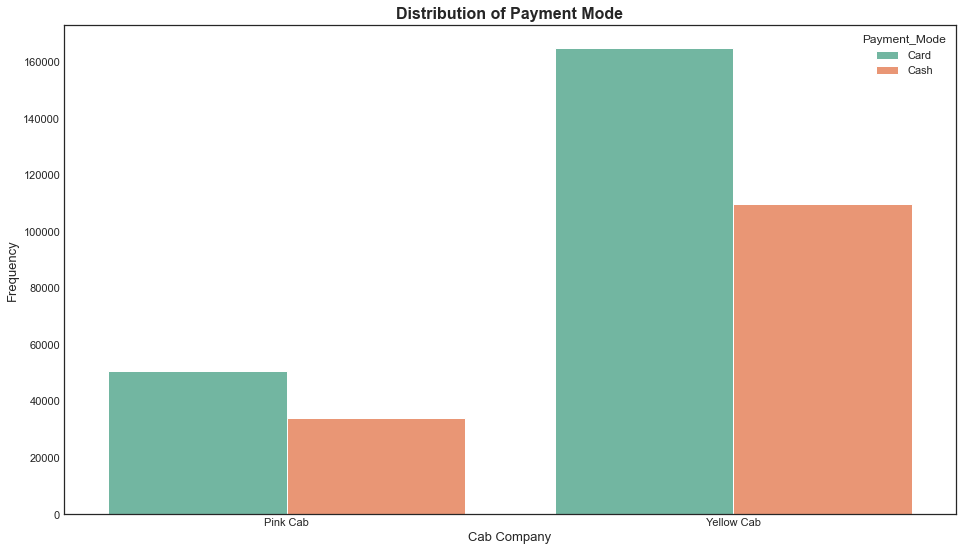

In [27]:
plt.figure(figsize = (16, 9))
sns.countplot(x="Company", hue="Payment_Mode", data=data, palette = "Set2")
plt.title('Distribution of Payment Mode', fontweight="bold", fontsize= 16)
plt.xlabel('Cab Company', fontsize= 13)
plt.ylabel('Frequency', fontsize= 13);

> - **Users prefer to pay with their credit cards rather than cash.**

### Figure 04: Age Distribution of the Cab Users

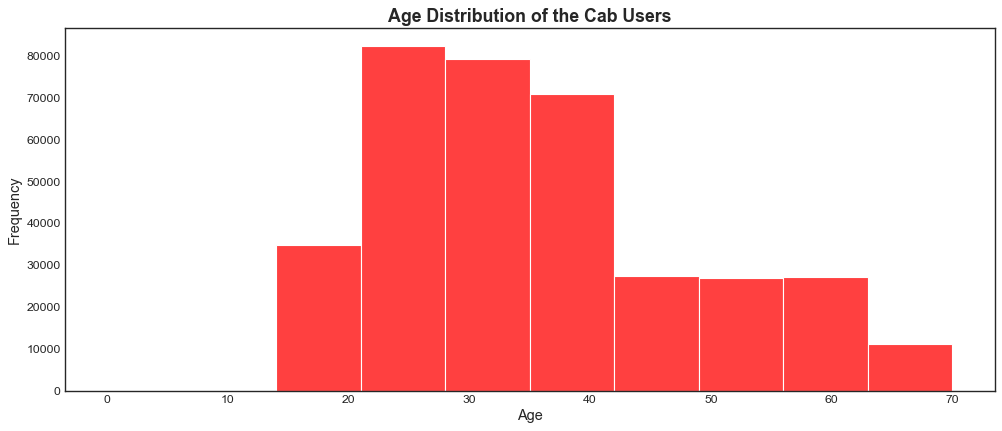

In [28]:
sns.set_color_codes(palette='deep')
plt.figure(figsize=(15, 6), dpi=80)

sns.histplot( data=data['Age'], binwidth=7, binrange=[0,70], color='red')
plt.title('Age Distribution of the Cab Users',fontweight="bold",fontsize= 16)
plt.xlabel('Age',fontsize=13)
plt.ylabel('Frequency', fontsize=13);

> - **The majority of cab users are between the ages of 20 and 40.**

### Figure 05: Gender distribution of cab users per Company

In [29]:
com_gender=data.groupby(['Company','Gender'])
com_gender  = com_gender['Customer ID'].nunique()
com_gender

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64

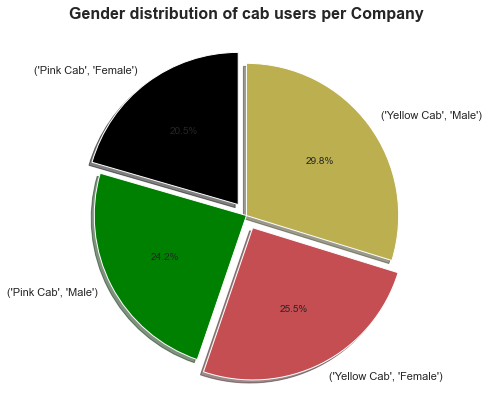

In [30]:
fig, ax = plt.subplots(figsize=(10,7))

epld = [0.09,0,0.09,0]
cls = ["black", "green", "r", "#BBAF50"]
ax.pie(com_gender.values , labels=com_gender.index, 
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        colors = cls,
        explode = epld)

plt.title('Gender distribution of cab users per Company', fontweight="bold",fontsize= 16)
plt.show();

> - **For both companies, males prefer to use cabs over females.**

### Figure 06: Seasonal distribution of user transactions for both the companies

- ###  Distribution of monthly travels (Pink Cab)

In [31]:
mon_pink=data[data.Company=='Pink Cab'].groupby(['Month'])['Transaction ID'].count()
mon_pink

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction ID, dtype: int64

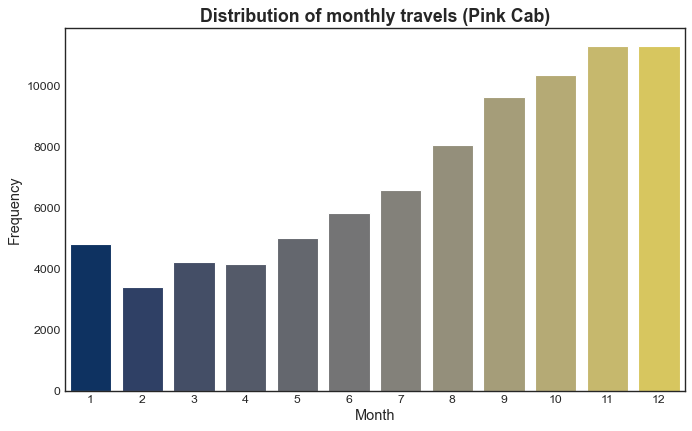

In [32]:
plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x=mon_pink.index,y=mon_pink.values, palette='cividis', ci=None)
plt.title('Distribution of monthly travels (Pink Cab)', fontweight="bold", fontsize= 16)
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Frequency',fontsize = 13)
plt.show();

- ### Distribution of monthly travels (Yellow Cab)

In [33]:
mon_yel=data[data.Company=='Yellow Cab'].groupby(['Month'])['Transaction ID'].count()
mon_yel

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction ID, dtype: int64

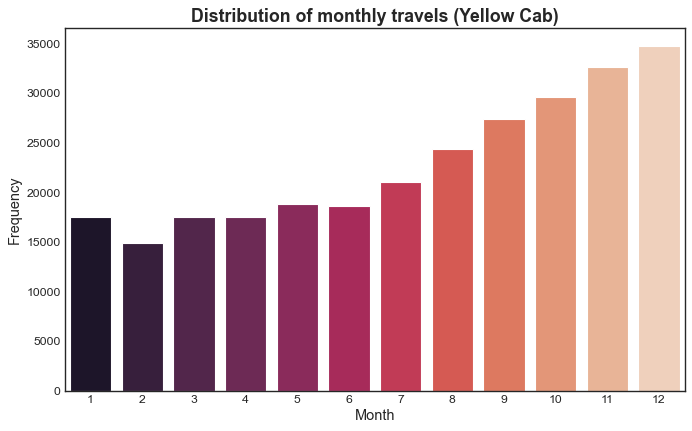

In [34]:
plt.figure(figsize=(10, 6), dpi=80)
sns.barplot(x=mon_yel.index,y=mon_yel.values, palette="rocket", ci=None)
plt.title('Distribution of monthly travels (Yellow Cab)', fontweight="bold", fontsize= 16)
plt.xlabel('Month', fontsize = 13)
plt.ylabel('Frequency',fontsize = 13)
plt.show();

> - **Beginning in the middle of the year and continuing until the end of the year, we can see a gradual increase in monthly travels for both cab companies.**

### Figure 07: Distribution of cab users according to the city

In [35]:
city_users=pd.DataFrame(data_city.groupby("City")["Users"].sum().sort_values(ascending=False))
city_users.reset_index(inplace=True)
city_users

,City,Users
0,NEW YORK NY,302149
1,SAN FRANCISCO CA,213609
2,CHICAGO IL,164468
3,LOS ANGELES CA,144132
4,WASHINGTON DC,127001
5,BOSTON MA,80021
6,SAN DIEGO CA,69995
7,SILICON VALLEY,27247
8,SEATTLE WA,25063
9,ATLANTA GA,24701


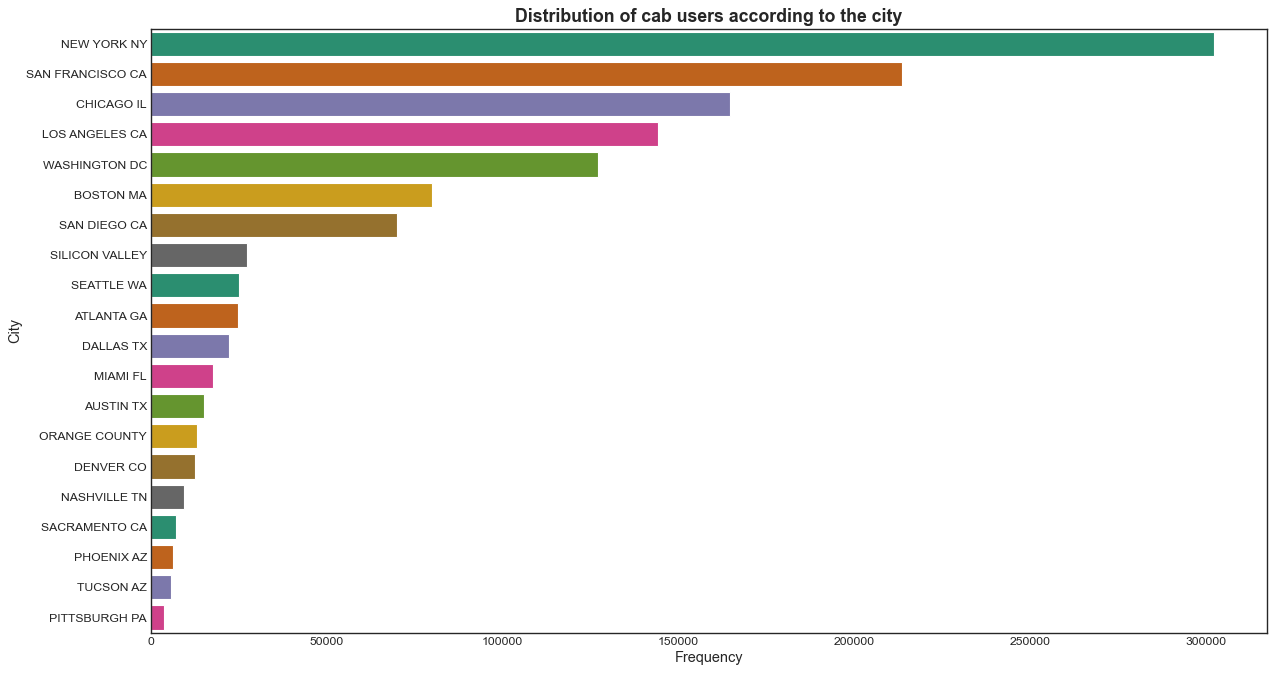

In [36]:
plt.figure(figsize=(18, 10), dpi=80)
sns.barplot(x="Users", y="City", data=city_users, palette= "Dark2",ci=None );
plt.title('Distribution of cab users according to the city', fontweight="bold", fontsize= 16)
plt.xlabel('Frequency', fontsize = 13)
plt.ylabel('City',fontsize = 13);

> - **The city with the most cab user transactions is New York, followed by San Francisco, Chicago, and Los Angeles.**

### Figure 08: Percentage of the Population Who Uses Cab Services in Cities distribution

In [37]:
data_city['Users/Population % margin'] = (data_city['Users'] /data_city['Population']) * 100 
user_popmarg=pd.DataFrame(data_city.groupby("City")["Users/Population % margin"].sum().sort_values(ascending=False))
user_popmarg.reset_index(inplace=True)
user_popmarg

,City,Users/Population % margin
0,SAN FRANCISCO CA,33.928217
1,BOSTON MA,32.141078
2,WASHINGTON DC,30.320705
3,LOS ANGELES CA,9.036279
4,CHICAGO IL,8.412126
5,SAN DIEGO CA,7.296413
6,SEATTLE WA,3.733847
7,NEW YORK NY,3.594514
8,ATLANTA GA,3.031225
9,NASHVILLE TN,2.832913


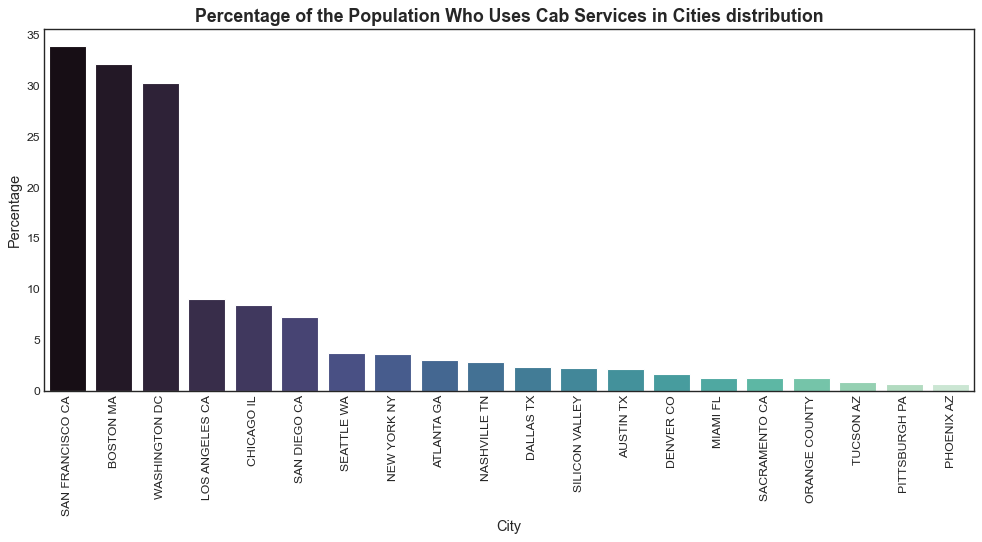

In [38]:
plt.figure(figsize=(15, 6), dpi=80)
sns.barplot(x=user_popmarg['City'], y=user_popmarg['Users/Population % margin'], palette= "mako",ci=None)
plt.xticks(rotation = 90)
plt.title('Percentage of the Population Who Uses Cab Services in Cities distribution' ,fontweight="bold",fontsize= 16)
plt.xlabel('City',fontsize=13)
plt.ylabel('Percentage', fontsize=13);

> - **Cabs are used by more than 30% of the population in San Francisco, Washington, and Boston.**

### Figure 08: Distribution of KM travelled

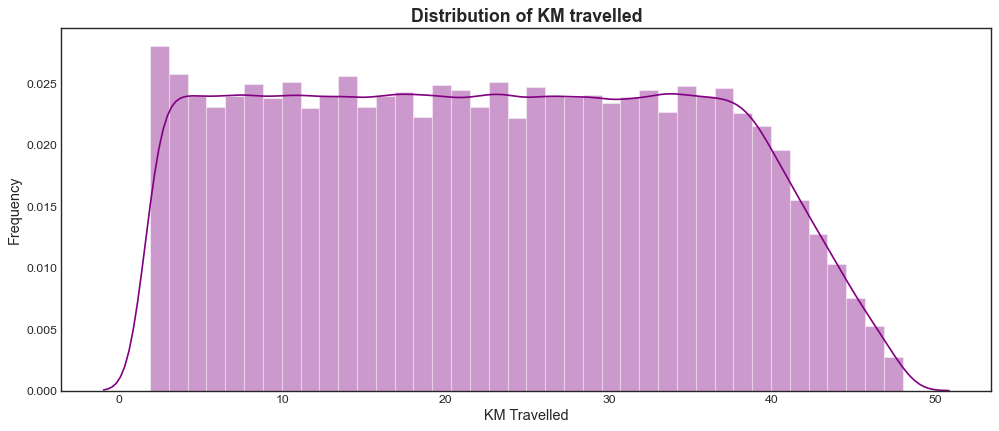

In [39]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
plt.figure(figsize=(15, 6), dpi=80)

sns.distplot(x=data['KM Travelled'], bins = 40, color='purple')

plt.title('Distribution of KM travelled',fontweight="bold",fontsize= 16)
plt.xlabel('KM Travelled',fontsize=13)
plt.ylabel('Frequency', fontsize=13);

> - **We can see that the majority of the rides are between 2 and 48 kilometers long.**

### Figure 09: Profit Distribution per Company

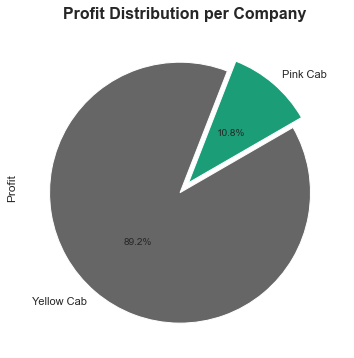

In [40]:
plt.figure(figsize = (10, 6))
plt.title("Profit Distribution per Company", fontweight="bold", fontsize= 16)

epld= [0.05]*2
Com_profit= data.groupby('Company')['Profit'].sum()
Com_profit.plot(kind='pie',startangle=30,
                autopct='%1.1f%%',
                explode=epld,
                pctdistance=0.5, colormap='Dark2');

>- **The 'Yellow Cab' Company received 89.2% of the total profit.**

### Figure 10: Profit distribution based on the month

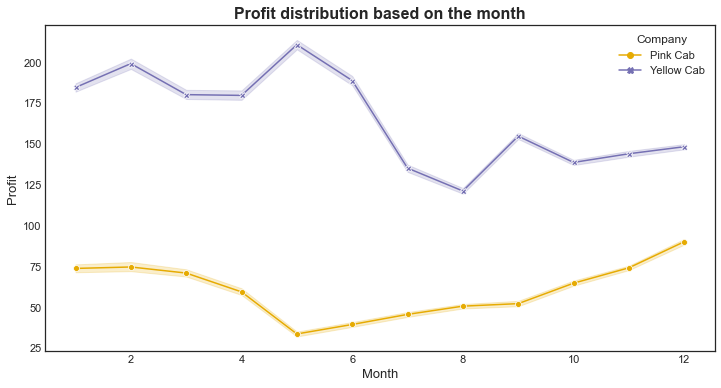

In [41]:
plt.figure(figsize = (12, 6))
sns.lineplot(x='Month', y='Profit', hue="Company", data=data, style="Company",
    markers=True, dashes=False, palette= 'Dark2_r')

plt.title("Profit distribution based on the month", fontweight="bold", fontsize= 16)
plt.xlabel("Month", fontsize= 13)
plt.ylabel("Profit", fontsize= 13)

plt.show()

### Figure 11:Distribution of Top 10 cities according to the Profit

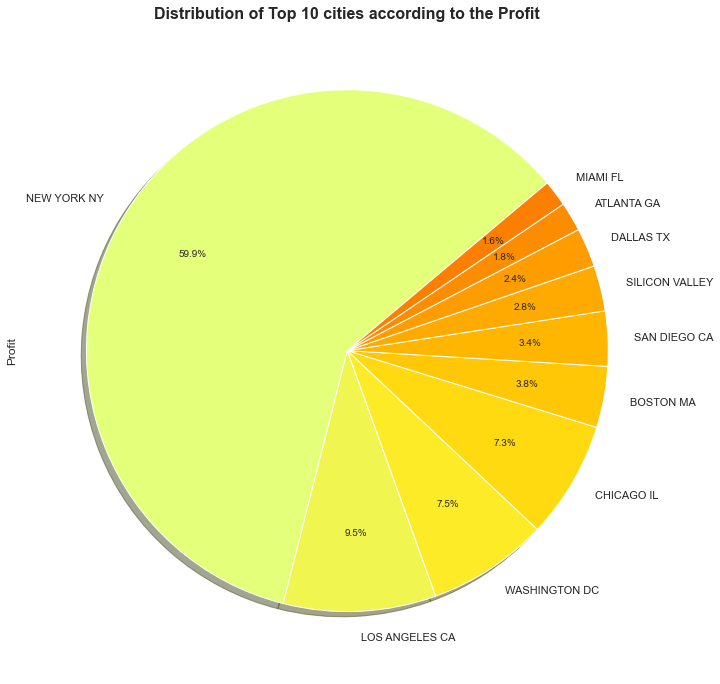

In [42]:
plt.figure(figsize = (20, 12))
plt.title("Distribution of Top 10 cities according to the Profit", fontweight="bold", fontsize= 16)

Top_city= data.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10)
Top_city.plot(kind='pie',startangle=40,
              autopct='%1.1f%%',
              pctdistance=0.7,
              shadow=True,
              colormap='Wistia');

> - **New York City generates 60% of both companies profits and has the highest number of users.**

### Figure 12:Profit Margin distribution

In [43]:
company = data.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()

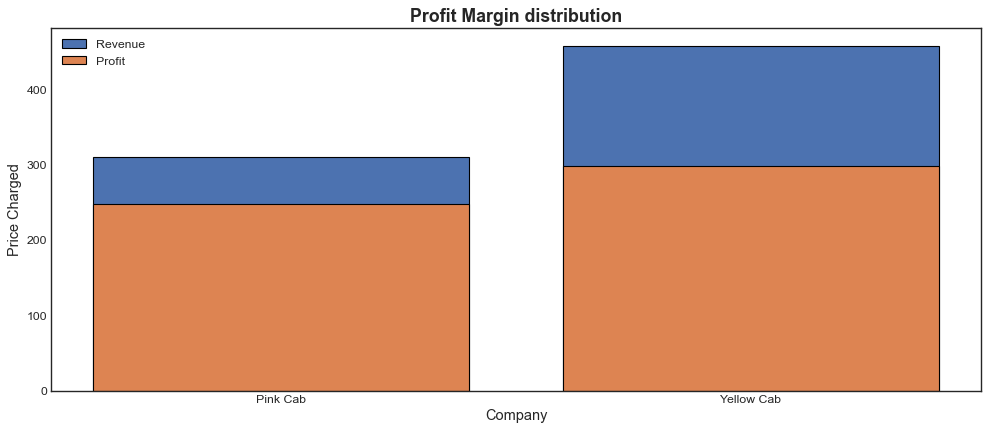

In [44]:
plt.figure(figsize=(15, 6), dpi=80)
plt.bar(cost_trip.index, price_charged.values, edgecolor='black', label="Revenue")
plt.bar(cost_trip.index, cost_trip.values, edgecolor='black', label="Profit")
plt.title('Profit Margin distribution',fontweight="bold", fontsize= 16)
plt.ylabel('Price Charged',fontsize = 13)
plt.xlabel('Company',fontsize = 13)
plt.legend()
plt.show();

> - **When compared to the Pink cab, the Yellow cab has a significantly higher profit margin.**

### Figure 14:Relationship between KM Travelled vs Price Charged 

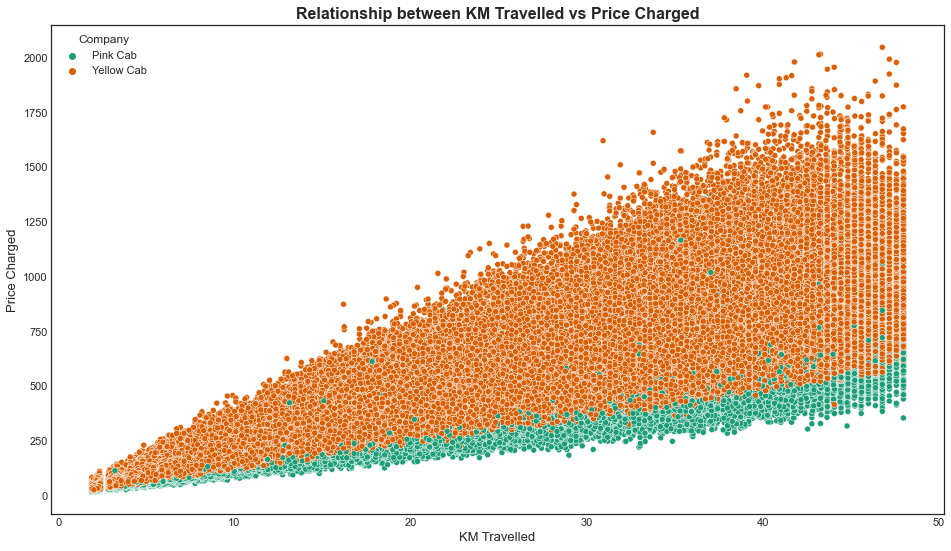

In [45]:
plt.figure(figsize = (16, 9))
sns.scatterplot(data=data, x="KM Travelled", y='Price Charged', hue='Company', palette= "Dark2")

plt.title('Relationship between KM Travelled vs Price Charged',fontweight="bold", fontsize= 16)
plt.ylabel('Price Charged',fontsize = 13)
plt.xlabel('KM Travelled',fontsize = 13);

> - **As expected In the graph, we can see that there is a positive correlation between 'KM Traveled' and 'Price Charged' for both the Pink and Yellow cabs.**

### Figure 15:Correlation Matrix

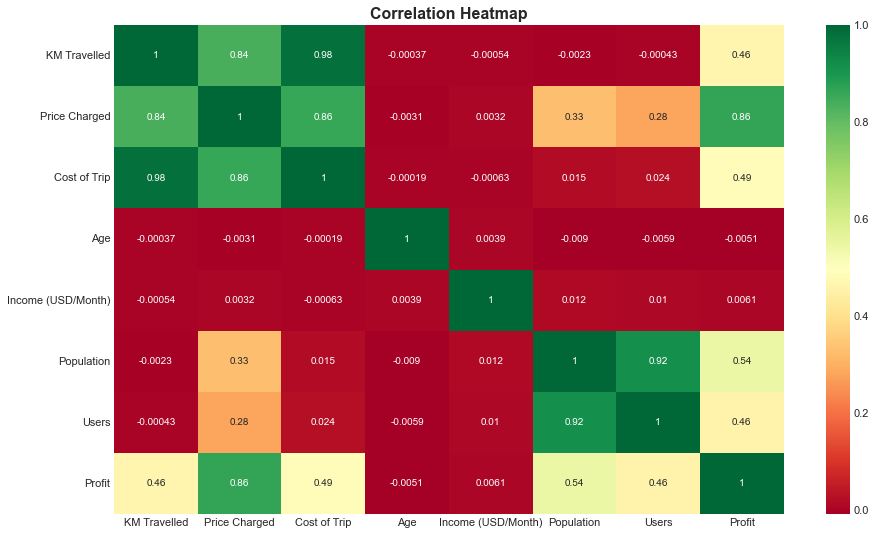

In [46]:
plt.figure(figsize = (15, 9))
plt.title('Correlation Heatmap', fontweight="bold", fontsize= 16)
corr_matrix = data[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users','Profit']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")
plt.show()

## Part 3- Creating Hypothesis and discussing their Results

### Hypothesis 1: Does the number of kilometers traveled vary according to the user's income level?

**Comments:**

> No, 

> According to the correlation matrix, a score of 1.0 is perfectly correlated. But the "KM Traveled" and "Income (USD/Month)" obtained a score of -0.00054. which indicates that they’re weakly negatively correlated. Check out the Figure 15.

### Hypothesis 2: Is there a seasonal variation in the number of customers using the cab service?

**Comments:**
> Yes, 

> We can see a gradual increase in monthly travels for both cab companies beginning in the middle of the year and continuing until the end of the year. Check out the Figure 06.

### Hypothesis 3: Is the city with the highest number of cab services and the city with the most cab users relative to their population the same?

**Comments:**
> No,

> Among the cities, New York has the most cab users. However, only 3.59% of their population uses cabs. But cities like San Francisco, Boston, and Washington have the most cab users relative to their populations. More than 30% of the population in these cities uses cabs. Check out the Figure 07 and Figure 08.

### Hypothesis 4: Do older people (Above 50) use cabs more often than younger people?

**Comments:**
> No,

> The majority of cab users are between the ages of 20 and 40. The least number of cab users are over 70 years old. Cab users aged between 40 and 60 are evenly distributed. Check out the Figure 04.

### Hypothesis 5: Do females use cabs more often than males?

**Comments:**
> No,

> Males prefer cabs over females for both companies. Check out the Figure 05.

### Hypothesis 6:  Do people prefer to pay with cards rather than cash?

**Comments:**
> Yes,

> For both companies, the majority of cab users prefer to pay with their cards rather than cash. Check out the Figure 03.

## Part 4- Conclusion and Recommendations

<ul>
<li>This report presents the Exploratory Data Analysis (EDA) of two cab companies in the United States: Pink Cab and Yellow Cab. All datasets were merged and cleansed before being used to create data visualizations for insight. We discovered that the master dataframe contains no null values and duplicate values. 

<li>Then I went through the EDA process and discovered that The "Yellow Cab" appears to make more profits than the 'Pink Cab.' Most users prefer to travel in a 'Yellow Cab' rather than a 'Pink Cab'. Furthermore, The 'Yellow cab' were more expensive than the 'Pink cab.' The 'Yellow Cab' has the highest cab utilization in the United States and a significantly higher profit margin than the 'Pink Cab.' The 'Yellow Cab' owns 89% of both companies' total profit. It has been observed that January and December have the highest number of cab users, which is understandable given that these are typically holiday months.

<li>In conclusuion, I recommend Yellow Cab  would be the better option to invest in.
<ul>